**Problem 2.1:** To walk “downhill” on the loss function (equation 2.5), we measure its gradient with
 respect to the parameters $\phi_0$ and $\phi_1$. Calculate expressions for the slopes $\frac{\partial \mathbf{L}}{\partial \phi_0}$ and $\frac{\partial \mathbf{L}}{\partial \phi_1}$.


Recall equation $(2.5)$ from the book:
$$L\left[\phi\right] = \sum_{i=1}^{I} \left( f\left[x_i, \phi\right] - y_i\right)^2$$
$$ = \sum_{i=1}^{I} \left( \phi_0 + \phi_1 x_i - y_i \right) \tag{2.5}.$$

To calculate the gradient with respect to $\phi_0$ and $\phi_1$, you need to remember the [power rule](https://en.wikipedia.org/wiki/Power_rule) and the [chain rule](https://en.wikipedia.org/wiki/Chain_rule) in the differentiation:
$$\frac{\partial L}{\partial \phi_0} = 2 \sum_{i=1}^{I} \left(\phi_0 + \phi_1 x_i - y_i\right).$$
$$\frac{\partial L}{\partial \phi_1} = 2 \sum_{i=1}^{I} \left(\phi_0 + \phi_1 x_i - y_i\right) x_i.$$

**Problem 2.2** Show that we can find the minimum of the loss function in closed form by setting the expression for the derivatives from problem $2.1$ to zero and solving for $\phi_0$ and $\phi_1$.

$$\frac{\partial L}{\partial \phi_0} = \sum_{i=1}^{I} \left(\phi_0 + \phi_1 x_i - y_i\right) = 0$$
$$\frac{\partial L}{\partial \phi_1} = \sum_{i=1}^{I} \left(\phi_0 + \phi_1 x_i - y_i\right) x_i = 0$$

Solving first for $\frac{\partial L}{\partial \phi_0}$:
$$\sum_{i=1}^{I} \left(\phi_0 + \phi_1 x_i - y_i\right) = 0$$
$$ = \phi_0 \sum_{i=1}^{I} 1 + \phi_1 \sum_{i=1}^{I} x_i - \sum_{i=1}^{I} y_i = 0$$
$$ = \phi_0 \left(\sum_{i=1}^{I} 1\right) +  I \phi_1 \left(\frac{1}{I}\sum_{i=1}^{I} x_i\right) - I \left(\frac{1}{I}\sum_{i=1}^{I} y_i\right) = 0$$

$\left(\frac{1}{I}\sum_{i=1}^{I} x_i\right)$ and $\left(\frac{1}{I}\sum_{i=1}^{I} y_i\right)$ are just the [expected value](https://en.wikipedia.org/wiki/Expected_value) of the inputs and the outputs respectively, and we can denote them by $E[x]$ and $E[y]$:
$$ = I \phi_0 +  I \phi_1 E[x] - I E[y] = 0$$
$$ = \phi_0 +  \phi_1 E[x] - E[y] = 0$$
$$ \phi_0 = E[y] - \phi_1 E[x] \tag{a} $$

Now lets solve for $\frac{\partial L}{\partial \phi_1}$:
$$\sum_{i=0}^{I} \left(\phi_0 + \phi_1 x_i - y_i\right) x_i = 0$$
$$ = \phi_0 \sum_{i=1}^{I} x_i + \phi_1 \sum_{i=1}^{I} x_i^2 - \sum_{i=1}^{I} y_i x_i = 0 \tag{b}$$
Substituting with $(a)$ in $(b)$:
$$ = \left(E[y] - \phi_1 E[x]\right) \sum_{i=1}^{I} x_i + \phi_1 \sum_{i=1}^{I} x_i^2 - \sum_{i=1}^{I} y_i x_i = 0$$
$$ = I \left(E[y] - \phi_1 E[x]\right) \left(\frac{1}{I}\sum_{i=1}^{I} x_i \right) + I \phi_1 \left( \frac{1}{I} \sum_{i=1}^{I} x_i^2 \right) - I \left( \frac{1}{I} \sum_{i=1}^{I} y_i x_i \right) = 0$$

$$ = \left(E[y] - \phi_1 E[x]\right) E[x] + \phi_1 E[x^2] - E[xy] = 0$$
$$\phi_1 \left(E[x^2] - E[x]E[x]\right) = E[xy] - E[x]E[y]$$

Now recall that:
$$Var[x] = E[x^2] - E[x]^2,$$
$$Cov[x, y] = E[xy] - E[x]E[y].$$
Then:
$$\phi_1 = \frac{Cov[x,y]}{Var[x]}\tag{c}$$

**Problem 2.3∗** Consider reformulating linear regression as a generative model, so we have $x = g[y, \phi] = \phi_0 + \phi_1 y$. What is the new loss function? Find an expression for the inverse function $y = g^{−1}[x, \phi]$ that we would use to perform inference. Will this model make the same predictions as the discriminative version for a given training dataset $\{xi,yi\}$? One way to establish this is to write code that fits a line to three data points using both methods and see if the result is the same.

$$x = \phi_0 + \phi_1 y$$
Then, the new loss function would be:
$$L\left[\phi\right] = \sum_{i=1}^{I} \left( f\left[y_i, \phi\right] - x_i\right)^2$$
$$ = \sum_{i=1}^{I} \left( \phi_0 + \phi_1 y_i - x_i \right) \tag{2.5}.$$
And, the expression for the inverse function $y = g^{-1}[x, \phi]$:
$$y = g^{-1}[x,\phi] = \frac{1}{\phi_1} x - \frac{\phi_0}{\phi_1}$$

The more the training dataset is [collinear](https://en.wikipedia.org/wiki/Collinearity), the more both results will give similar results. Because $g[y,\phi]$ will try to fit the best line to data based on the horizontal distance between the points and the fitted line, in contrast, $g^{-1}[x,\phi]$ will try to fit the best line based on the vertical distance. So, both methods will find the exact same result if the dataset if perfectly collinear.

Lets try to fit a line with both methods to three data points that are not collinear

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
x = np.array([0.1, 0.7, 1.3])
y = np.array([0.4, 1.0, 0.9])

In [20]:
phi_0, phi_1 = 0.2, 0.5
theta_0, theta_1 = 0.5, -0.1

In [21]:
def f(inp, p0, p1):
    return p0 + p1 * inp

In [22]:
def plot(x, y, p0, p1, which="x"):
    fig, ax = plt.subplots()
    plt.xlim([0, 2.0])
    plt.ylim([0, 2.0])
    ax.scatter(x, y)
    inp = np.arange(0.0, 2.0, 0.1)
    if which == "x":
        plt.plot(inp, f(inp, p0, p1), "b-", lw=2)
    else:
        plt.plot(f(inp, p0, p1), inp, "b-", lw=2)
    plt.show()

In [23]:
x_mean  = np.mean(x)
y_mean  = np.mean(y)
xx_mean = np.mean(x*x)
yy_mean = np.mean(y*y)
xy_mean = np.mean(x*y)
var_x   = xx_mean - x_mean**2
var_y   = yy_mean - y_mean**2
cov_xy  = xy_mean - x_mean * y_mean

First method $g[y, \phi]$:
$$\phi_1 = \frac{Cov[x,y]}{Var[y]}$$
$$ \phi_0 = E[x] - \phi_1 E[y]$$
Second method $g[x, \theta]$:
$$\theta_1 = \frac{Cov[x,y]}{Var[x]}$$
$$ \theta_0 = E[y] - \theta_1 E[x]$$

In [24]:
# first method g[y, phi]
phi_1 = cov_xy / var_y
phi_0 = x_mean - phi_1 * y_mean

# fist method g[x, theta]
theta_1 = cov_xy / var_x
theta_0 = y_mean - theta_1 * x_mean

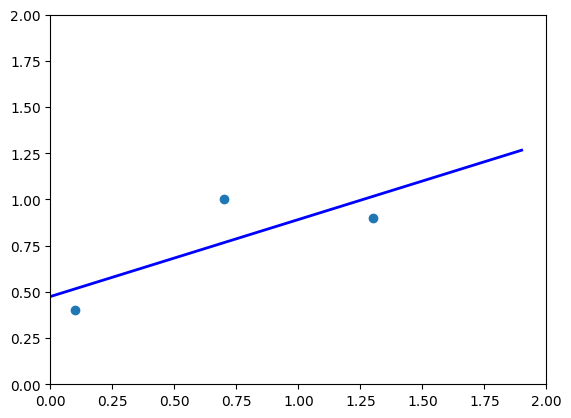

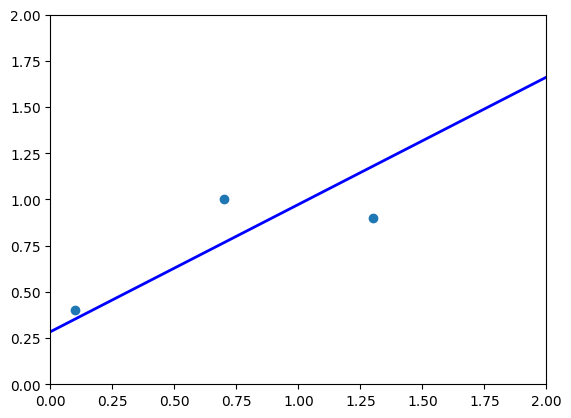

(None, None)

In [25]:
plot(x, y, theta_0, theta_1, "x"), plot(x, y, phi_0, phi_1, "y")

Clearly the two lines are different.
<br>
Now, Lets try one more time but with perfectly collinear points: 

In [26]:
x = np.array([0.1, 0.7, 1.3])
y = np.array([0.4, 1.0, 1.6])

In [27]:
x_mean  = np.mean(x)
y_mean  = np.mean(y)
xx_mean = np.mean(x*x)
yy_mean = np.mean(y*y)
xy_mean = np.mean(x*y)
var_x   = xx_mean - x_mean**2
var_y   = yy_mean - y_mean**2
cov_xy  = xy_mean - x_mean * y_mean

# first method g[y, phi]
phi_1 = cov_xy / var_y
phi_0 = x_mean - phi_1 * y_mean

# fist method g[x, theta]
theta_1 = cov_xy / var_x
theta_0 = y_mean - theta_1 * x_mean

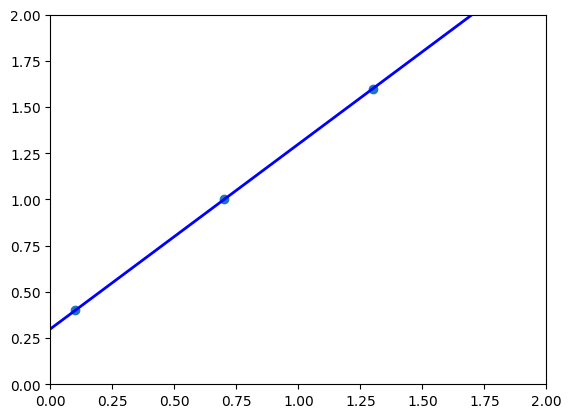

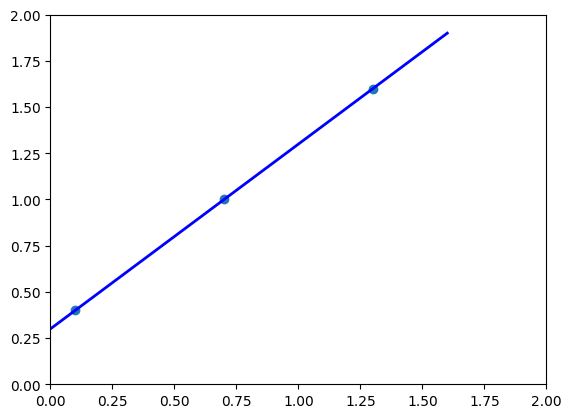

(None, None)

In [28]:
plot(x, y, theta_0, theta_1, "x"), plot(x, y, phi_0, phi_1, "y")